In [3]:
import MDAnalysis
from MDAnalysis import Universe
u = Universe('INT2.pdb','INT2.xtc')

In [4]:
print (u.atoms)
import MDAnalysis.analysis.pca as pca
pc= pca.PCA(u, select='backbone',n_components=10)
pc.run()

<AtomGroup [<Atom 1: CA of type C of resname LEU, resid 1 and segid A and altLoc >, <Atom 2: CA of type C of resname ASN, resid 2 and segid A and altLoc >, <Atom 3: CA of type C of resname LEU, resid 3 and segid A and altLoc >, ..., <Atom 1768: CA of type C of resname ARG, resid 1768 and segid B and altLoc >, <Atom 1769: CA of type C of resname GLY, resid 1769 and segid B and altLoc >, <Atom 1770: CA of type C of resname THR, resid 1770 and segid B and altLoc >]>


In [5]:
import numpy as np
n_pcs = np.where(pc.cumulated_variance > 0.95)[0][0]
atomgroup = u.select_atoms('backbone')
pca_space = pc.transform(atomgroup, n_components=n_pcs)

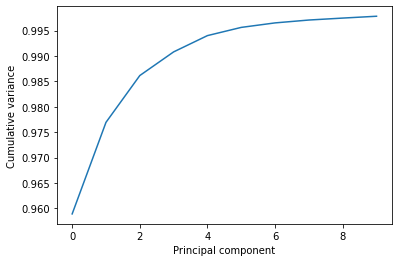

In [6]:
import matplotlib.pyplot as plt
plt.plot(pc.cumulated_variance[:10])
plt.xlabel('Principal component')
plt.ylabel('Cumulative variance');

In [7]:
print(pca_space.shape)

(5047, 0)


In [8]:
print(pc.cumulated_variance)


[0.95890191 0.97693069 0.98614204 0.9907987  0.99400421 0.99562127
 0.99650662 0.99707142 0.99745436 0.99781631]


In [9]:
transformed = pc.transform(atomgroup, n_components=3)
PC1=transformed[:,0]
PC2=transformed[:,1]
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
print(PC1)
#print(PC2)

[-4194.75238227 -4063.01119144 -4085.05806405 -4136.78555994
 -4179.89715868 -4243.54856764 -4198.04992446 -4129.1404129
 -4219.26448768 -4112.55548135 -4136.08571907 -4004.76360198
 -3964.70489974 -3945.91185753 -4034.62409207 -4026.14480187
 -3993.6663179  -3908.03584952 -3788.55610927 -3901.65191485
 -4150.79620891  2888.64147819 -4160.9036731   3005.9014071
  2868.5694511   2996.08195841  3000.52515247  2998.96437804
  3032.76496681  3023.84301601  3137.91109221 -4100.250206
  3227.69412821  3286.06731346  3294.45067356  3381.62971358
  3309.15557678  3146.99206996  3195.69531906  3235.44528799
  3204.88034461  3270.55735469  3248.525169    3274.16596915
  3314.94995015  3337.23191716  3280.28538873  3268.15191939
  3279.59970654  3183.54704996  3214.85766908  3140.27517739
  3217.3938749   3023.70404064  3148.75064441  3114.81021567
  3152.55520607  3071.98956844  3141.36099353  3161.23153196
  3057.26726411  2974.20208631  3028.7259136   3130.44018851
  3131.94175349  3199.337463

In [11]:
import pandas as pd
df = pd.DataFrame(transformed,
columns=['PC{}'.format(i+1) for i in range(3)])
df['Time (ns)'] = df.index * u.trajectory.dt *0.001  #dt is in ps its value is 100ps we convert it to ns using 0.001 then dt becomes 0.1 ns so to get 100 ns we multiply 1000
# print(u.trajectory.dt*0.001)
#print(df['Time (ns)'])
data=np.column_stack([PC1, PC2,df['Time (ns)']])
datafile_path = "/Users/nidhisoley/Desktop/RA-SCI/int2/dataint2.txt"
np.savetxt(datafile_path , data, fmt=['%0.4f','%0.4f','%0.4f'])

df.head()

,PC1,PC2,PC3,Time (ns)
0,-4194.752382,277.466080,158.065229,0.0
1,-4063.011191,329.735342,107.704411,0.1
2,-4085.058064,307.335569,95.857664,0.2
3,-4136.785560,298.101273,58.853676,0.3
4,-4179.897159,307.514581,86.595707,0.4


/Users/nidhisoley/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


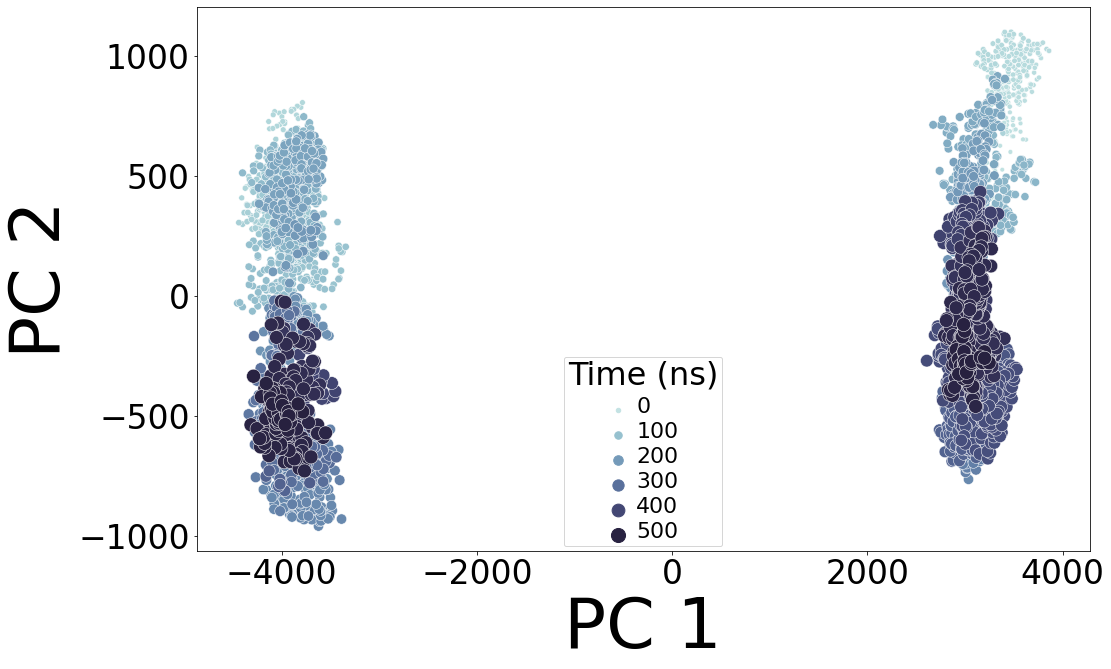

In [9]:
fig = plt.figure(figsize = (16,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC 1', fontsize = 70)
ax.set_ylabel('PC 2', fontsize = 70)
#ax.set_title('Plot of 1st Two Principal Components', fontsize = 30)
# Create as many colors as there are unique midwest['category']
import seaborn as sns
g =sns.scatterplot(PC1, PC2,
              hue='Time (ns)',
              data=df,size="Time (ns)",sizes=(20, 200),palette="ch:start=.2,rot=-.3");
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title

# ax.scatter(PC1, PC2, s = 50,c='Time (s)')
plt.xticks(fontsize=33)
plt.yticks(fontsize=33)
#ax.grid()
plt.savefig('/Users/nidhisoley/Desktop/RA-SCI/int2/int2pca.png',bbox_inches="tight")

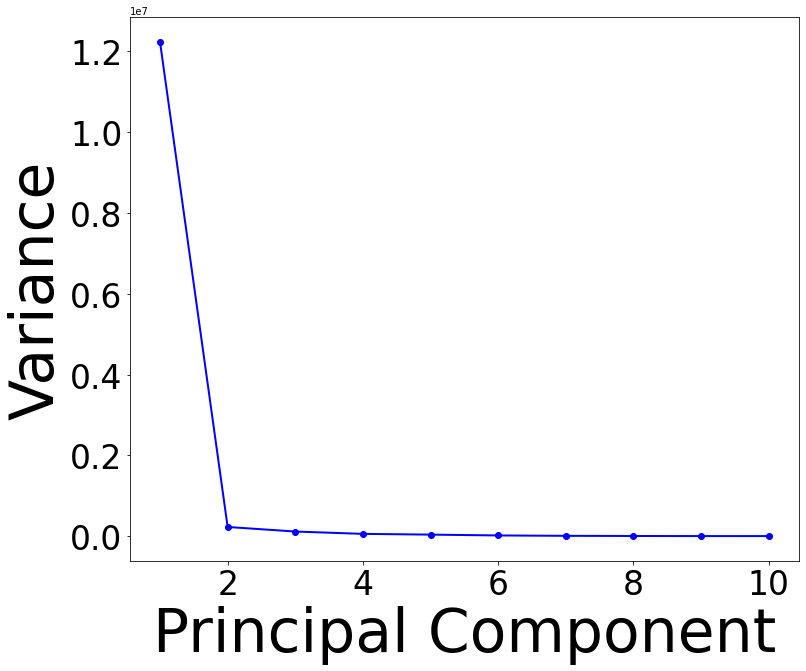

In [13]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12,10))
PC_values = np.arange(pc.n_components) + 1
ax=plt.plot(PC_values, pc.variance, 'ro-', linewidth=2,color="blue")
plt.xlabel('Principal Component', fontsize = 60)
plt.ylabel('Variance', fontsize = 60)
#plt.title('Scree Plot', fontsize = 40)
plt.xticks(fontsize=33)
plt.yticks(fontsize=33)
plt.savefig('/Users/nidhisoley/Desktop/RA-SCI/int2/int2scree.png',bbox_inches="tight")
plt.show()


In [7]:
pc.variance


array([1.12712657e+07, 1.98096045e+05, 1.37649145e+05, 5.60289918e+04,
       2.32393936e+04, 1.02670920e+04, 7.46197678e+03, 6.13564357e+03,
       4.38488689e+03, 3.78997055e+03])